2024-11-18 13:22:51.148738: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Enter the image URL:  https://i.postimg.cc/L5T755CN/nafs.jpg


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


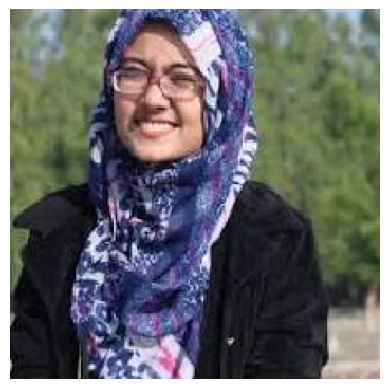

Top 3 Predictions:
1. stole: 56.23%
2. cloak: 8.51%
3. abaya: 4.80%


In [1]:
import numpy as np
import requests
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
from io import BytesIO

# Step 1: Function to fetch image from URL
def fetch_image_from_url(url):
    """
    Fetches an image from the URL and converts it into a format that TensorFlow can handle.
    """
    response = requests.get(url)
    image_data = BytesIO(response.content)  # Convert to BytesIO object
    img = image.load_img(image_data, target_size=(224, 224))  # Load image with target size (224x224)
    return img

# Step 2: Preprocess the image for MobileNetV2
def preprocess_image(img):
    """
    Converts the image into a format that MobileNetV2 can understand (preprocessing).
    """
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (MobileNetV2 expects a batch)
    img_array = preprocess_input(img_array)  # Preprocess the image for MobileNetV2
    return img_array

# Step 3: Use MobileNetV2 to predict the class of the image
def classify_image(img_array):
    """
    Classifies the image and returns the predicted labels.
    """
    # Load the pre-trained MobileNetV2 model
    model = MobileNetV2(weights='imagenet')

    # Make a prediction
    predictions = model.predict(img_array)

    # Decode the predictions (get human-readable class labels)
    decoded_predictions = decode_predictions(predictions, top=3)[0]  # Get top 3 predictions
    return decoded_predictions

# Step 4: Display the image and predictions
def display_results(img, predictions):
    """
    Displays the image along with the top 3 predicted labels.
    """
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes for a cleaner view
    plt.show()

    # Print the top 3 predictions
    print("Top 3 Predictions:")
    for i, (imagenet_id, label, score) in enumerate(predictions):
        print(f"{i+1}. {label}: {score*100:.2f}%")


# Get image URL from user input
url = input("Enter the image URL: ")

# Fetch the image from URL
img = fetch_image_from_url(url)

# Preprocess the image for MobileNetV2
img_array = preprocess_image(img)

# Classify the image using MobileNetV2
predictions = classify_image(img_array)

# Display the image and predictions
display_results(img, predictions)

